In [1]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/aymanlafaz/wind-energy-germany")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alexandertropin
Your Kaggle Key: ········


100%|███████████████████████████████████████| 14.9k/14.9k [00:00<00:00, 720kB/s]

In [ ]:
'''
utc_timestamp : Time in UTC
wind_generation : Daily wind production in MW
wind_capacity : Electrical capacity of wind in MW
temperature : Daily Temperature in degrees C

'''

In [2]:
import pandas as pd

In [73]:
wind_df = pd.read_csv('wind-energy-germany/germany-wind-energy.csv')
wind_df.head()

,utc_timestamp,wind_generation_actual,wind_capacity,temperature
0,2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
1,2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2,2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
3,2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
4,2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [55]:
# wind_df.shape

In [56]:
# wind_df.info()

In [57]:
# wind_df.info()

In [74]:
wind_df.utc_timestamp = pd.to_datetime(wind_df.utc_timestamp)
wind_df['date'] = pd.to_datetime(wind_df['utc_timestamp']).dt.date
wind_df = wind_df.drop(['utc_timestamp'], axis=1)
wind_df.head()

,wind_generation_actual,wind_capacity,temperature,date
0,291760.0,37149.130,-2.117,2017-01-01
1,295097.0,37152.125,-1.154,2017-01-02
2,666170.0,37155.208,-0.239,2017-01-03
3,686581.0,37160.125,0.620,2017-01-04
4,261759.0,37163.542,-3.908,2017-01-05


In [75]:
wind_df = wind_df.set_index('date')
wind_df.head()

,wind_generation_actual,wind_capacity,temperature
date,,,
2017-01-01,291760.0,37149.130,-2.117
2017-01-02,295097.0,37152.125,-1.154
2017-01-03,666170.0,37155.208,-0.239
2017-01-04,686581.0,37160.125,0.620
2017-01-05,261759.0,37163.542,-3.908


In [77]:
wind_df.iloc[0]

wind_generation_actual    291760.000
wind_capacity              37149.130
temperature                   -2.117
Name: 2017-01-01, dtype: float64

In [78]:
wind_df.iloc[0:2]

,wind_generation_actual,wind_capacity,temperature
date,,,
2017-01-01,291760.0,37149.130,-2.117
2017-01-02,295097.0,37152.125,-1.154


In [88]:
from datetime import date

wind_df_2017 = wind_df.loc[date.fromisoformat('2017-01-01'):date.fromisoformat('2017-12-31')]
wind_df_2017

,wind_generation_actual,wind_capacity,temperature
date,,,
2017-01-01,291760.0,37149.130,-2.117
2017-01-02,295097.0,37152.125,-1.154
2017-01-03,666170.0,37155.208,-0.239
2017-01-04,686581.0,37160.125,0.620
2017-01-05,261759.0,37163.542,-3.908
...,...,...,...
2017-12-27,394505.0,42668.167,1.951
2017-12-28,506423.0,42745.000,0.806
2017-12-29,584277.0,42837.625,-0.335


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


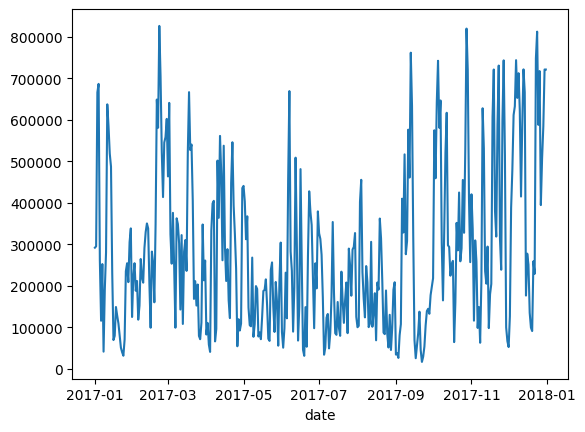

In [89]:
wind_df_2017['wind_generation_actual'].plot()
plt.show()

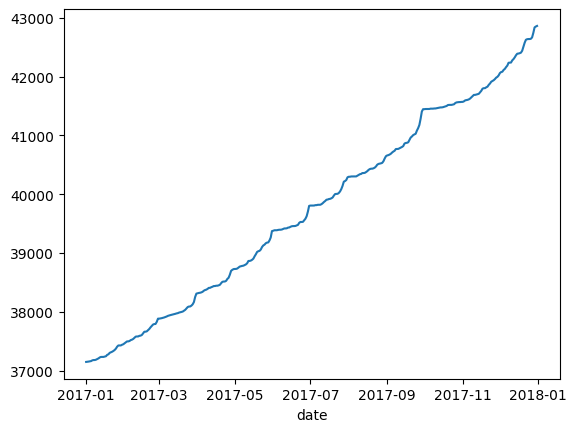

In [90]:
wind_df_2017['wind_capacity'].plot()
plt.show()

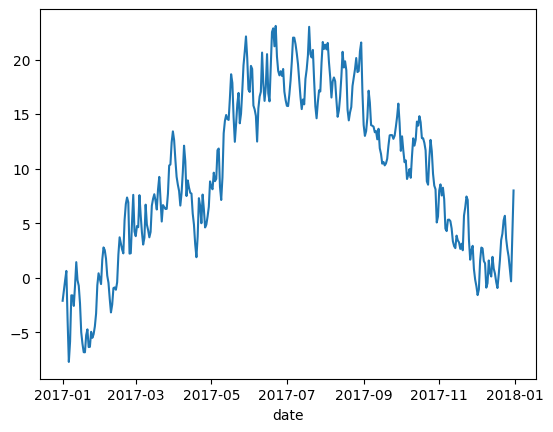

In [91]:
wind_df_2017['temperature'].plot()
plt.show()

In [92]:
wind_df_2017['wind_capacity_lag'] = wind_df_2017['wind_capacity'] - wind_df_2017['wind_capacity'].shift()
wind_df_2017.head()

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_80908/2653269444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_df_2017['wind_capacity_lag'] = wind_df_2017['wind_capacity'] - wind_df_2017['wind_capacity'].shift()


,wind_generation_actual,wind_capacity,temperature,wind_capacity_lag
date,,,,
2017-01-01,291760.0,37149.130,-2.117,NaN
2017-01-02,295097.0,37152.125,-1.154,2.995
2017-01-03,666170.0,37155.208,-0.239,3.083
2017-01-04,686581.0,37160.125,0.620,4.917
2017-01-05,261759.0,37163.542,-3.908,3.417


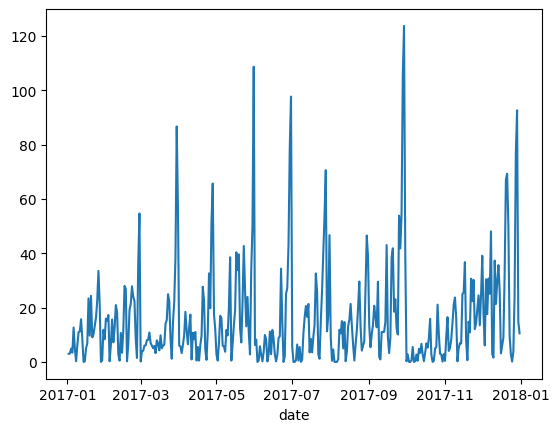

In [93]:
wind_df_2017['wind_capacity_lag'].plot()
plt.show()

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_80908/2619199179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_df_2017['wind_generation_actual_ret'] = wind_df_2017['wind_generation_actual'].pct_change()
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_80908/2619199179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_df_2017['temperature_ret'] = wind_df_2017['temperature'].pct_change()


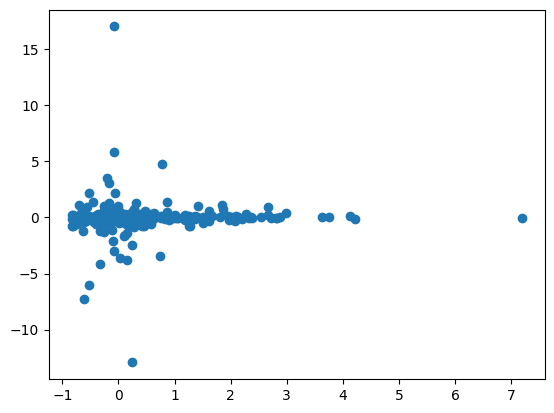

In [94]:
wind_df_2017['wind_generation_actual_ret'] = wind_df_2017['wind_generation_actual'].pct_change()
wind_df_2017['temperature_ret'] = wind_df_2017['temperature'].pct_change()

plt.scatter(wind_df_2017['wind_generation_actual_ret'], wind_df_2017['temperature_ret'])
plt.show()

In [96]:
# correlation of levels
correlation_levels = wind_df_2017['wind_generation_actual'].corr(wind_df_2017['temperature'])
print(correlation_levels)

# correlation of changes
correlation_changes = wind_df_2017['wind_generation_actual_ret'].corr(wind_df_2017['temperature_ret'])
print(correlation_changes)

-0.24459952590836528
0.02958558254349996


In [ ]:
'''
there is no correlation between wind and tempetature
'''

In [ ]:
'''
autocorrelation (serial correlation):
'''

In [97]:

autocorrelation = wind_df_2017['wind_capacity_lag'].autocorr()
autocorrelation

0.5532694249672682

In [98]:

autocorrelation2 = wind_df_2017['wind_generation_actual_ret'].autocorr()
autocorrelation2

-0.10916622450947626

In [ ]:
# Use the .resample() method with rule='W' followed by the function .last() to convert daily data to weekly data.

In [ ]:
# Convert the daily data to annual data
# yearly_rates = daily_rates.resample(rule='A').last()


In [99]:
# Create a new DataFrame, daily_diff, of changes in daily rates using the .diff() method.

# daily_diff = daily_rates.diff()
wind_df_2017_diff = wind_df_2017.diff()
wind_df_2017_diff.head()

,wind_generation_actual,wind_capacity,temperature,wind_capacity_lag,wind_generation_actual_ret,temperature_ret
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,3337.0,2.995,0.963,NaN,NaN,NaN
2017-01-03,371073.0,3.083,0.915,0.088,1.246024,-0.338005
2017-01-04,20411.0,4.917,0.859,1.834,-1.226822,-2.801248
2017-01-05,-424822.0,3.417,-4.528,-1.500,-0.649389,-3.709084
